# EDA ON HEALTH CARE DATA

## Import libraries:

In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Download Data set from Github:

In [2]:
url = 'https://raw.githubusercontent.com/pik1989/EDAforHealthcare/main/Data.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Check shape of the data i.e no. of rows and columns:

In [4]:
df.shape

(110527, 13)

#### In our dataset we have 13 columns and 110527 rows

#### let's see some more information regarding data types of columns and Null values present in columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   AppointmentID   110527 non-null  int64 
 1   Gender          110527 non-null  object
 2   ScheduledDay    110527 non-null  object
 3   AppointmentDay  110527 non-null  object
 4   Age             110527 non-null  int64 
 5   Neighbourhood   110527 non-null  object
 6   Scholarship     110527 non-null  int64 
 7   Hipertension    110527 non-null  int64 
 8   Diabetes        110527 non-null  int64 
 9   Alcoholism      110527 non-null  int64 
 10  Handcap         110527 non-null  int64 
 11  SMS_received    110527 non-null  int64 
 12  No-show         110527 non-null  object
dtypes: int64(8), object(5)
memory usage: 11.8+ MB


#### we dont have Null values in any column

### modifying the date and time into standard form for 'ScheduledDay' & 'AppointmentDay' columns

In [6]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
df.head(5)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### for the schedule day and appointment day storing the weekdays only into a variable like 5 is Saturday, 6 is Sunday by creating new columns


In [8]:
df['sch_weekday'] = df['ScheduledDay'].dt.dayofweek
df['app_weekday'] = df['AppointmentDay'].dt.dayofweek

In [9]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
PatientId,,,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


#### Let's see the count i.e total number of patients scheduled on monday, tuesday and so on..

In [10]:
df['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

#### Now will see total number of patients got appointment on monday, tuesday and so on..

In [11]:
df['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

#### Check the columns

In [12]:
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'sch_weekday',
       'app_weekday'],
      dtype='object')

#### changing the name of some cloumns since they are wrongly spelled

In [13]:
df= df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [14]:
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow', 'sch_weekday',
       'app_weekday'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AppointmentID   110527 non-null  int64         
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   Age             110527 non-null  int64         
 5   Neighbourhood   110527 non-null  object        
 6   Scholarship     110527 non-null  int64         
 7   Hypertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handicap        110527 non-null  int64         
 11  SMSReceived     110527 non-null  int64         
 12  NoShow          110527 non-null  object        
 13  sch_weekday     110527 non-null  int64         
 14  app_week

### Dropping some columns which have no significance since they have increment values like Appointment Id etc

In [16]:
df.drop(['AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [17]:
df.reset_index(drop=True)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.8+

### Now let's see some statistical information for numerical columns

In [19]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


#### let's do a small plot for NoShow column 

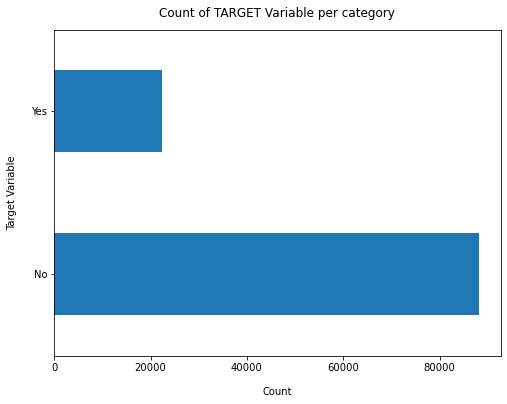

In [20]:
df['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

#### calculating the % of appointments based on NoShow column

In [21]:
100*df['NoShow'].value_counts()/len(df['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

#### count based on NoShow column

In [22]:
df['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

### Having a look that data contains missing values or not 

C:\Users\sakhil\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


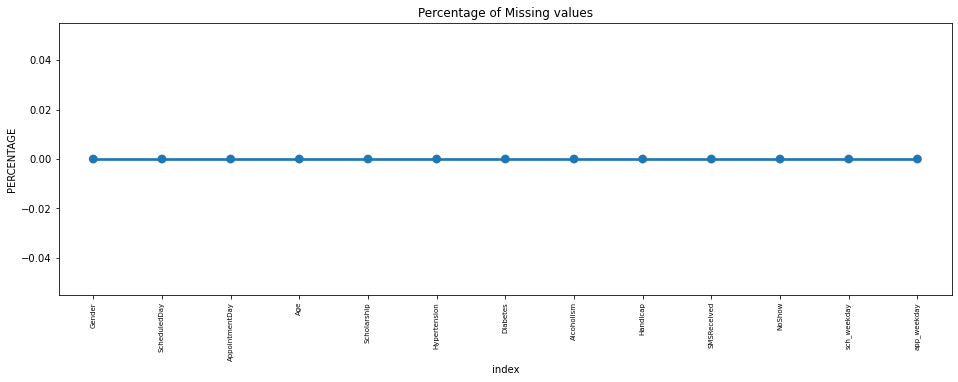

In [23]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data Initial Intuition
- Here we dont have any missing data

### General Thumb Rules:
- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis

## Data Cleaning:

#### Create a copy of base data for manupulation & processing

In [24]:
new_data = df.copy()

In [25]:
new_data .info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110527 entries, 29872499824296.0 to 377511518121127.0
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int64         
 12  app_weekday     110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.8+

#### As we don't have any null records, there's no data cleaning required

#### Get max tenure

In [26]:
print(df['Age'].max())

115


#### Group the tenure in bins of 12 months by creating new column called Age_group

In [39]:
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

df['Age_group'] = pd.cut(df.Age, range(1, 130, 20), right=False, labels=labels)

AttributeError: 'DataFrame' object has no attribute 'Age'

#### Now delete the Age column since we create new column Age_group with bins

In [28]:
df.drop('Age',axis=1,inplace=True)

In [29]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
       'NoShow', 'sch_weekday', 'app_weekday', 'Age_group'],
      dtype='object')

## Data Exploration:

In [30]:
list(df.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

#### having a loook into the values of count of each columns and there count with respect to NoShow column

---------- Gender ----------
F    71840
M    38687
Name: Gender, dtype: int64
---------- ScheduledDay ----------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64
---------- AppointmentDay ----------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64
---------- Scholarship ----------
0    99666
1 

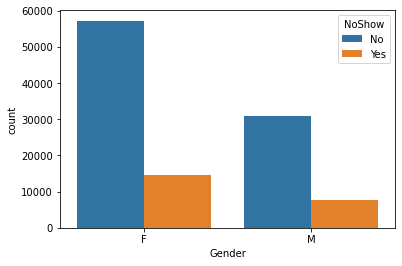

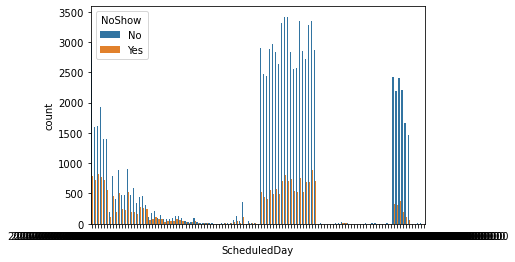

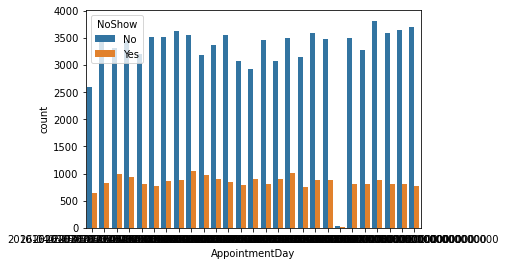

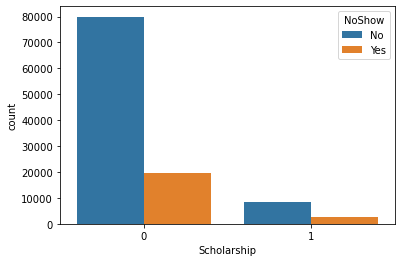

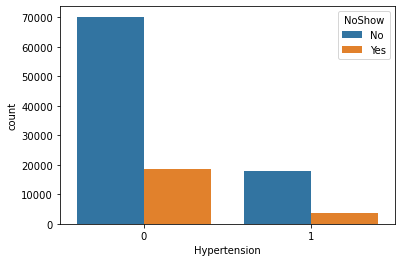

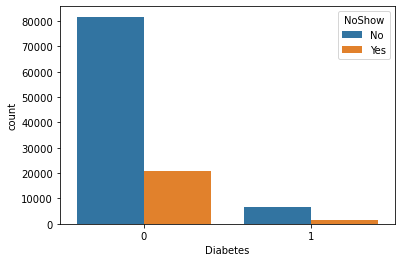

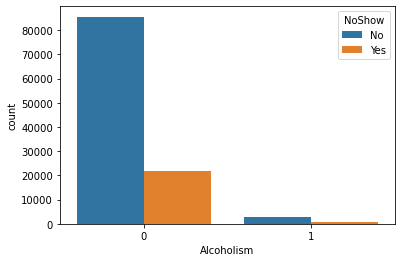

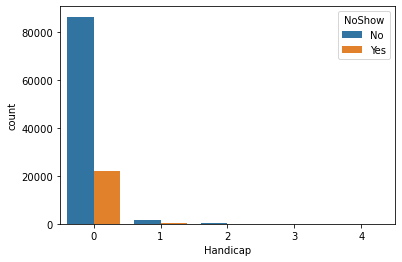

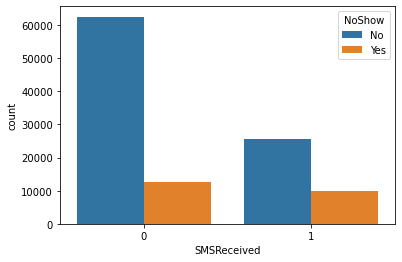

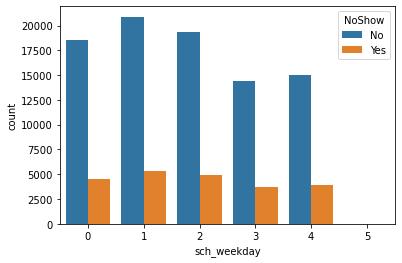

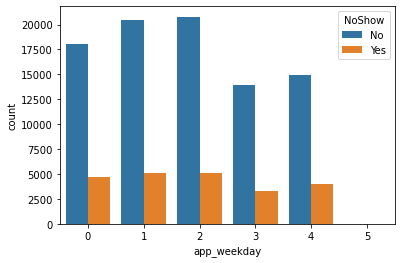

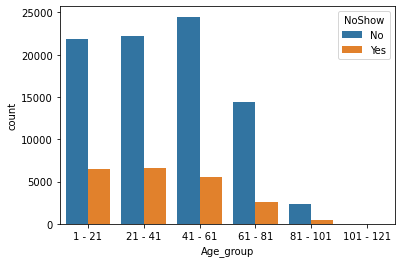

In [31]:
for i, predictor in enumerate(df.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(df[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='NoShow')

#### Replacing 'yes or no' values of NoShow column to '1 & 0' where Yes=1 & No=0

In [32]:
df['NoShow'] = np.where(df.NoShow == 'Yes',1,0)

In [33]:
df.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

#### Convert all the categorical variables into dummy variables

In [40]:
df_dummies = pd.get_dummies(df)
df_dummies= df.reset_index(drop=True)
df_dummies.head()

,Gender,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Age_group
0,F,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,61 - 81
1,M,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,41 - 61
2,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,61 - 81
3,F,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,1 - 21
4,F,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,41 - 61


#### Build a corelation of all columns w.r.t 'NoShow'

<AxesSubplot:>

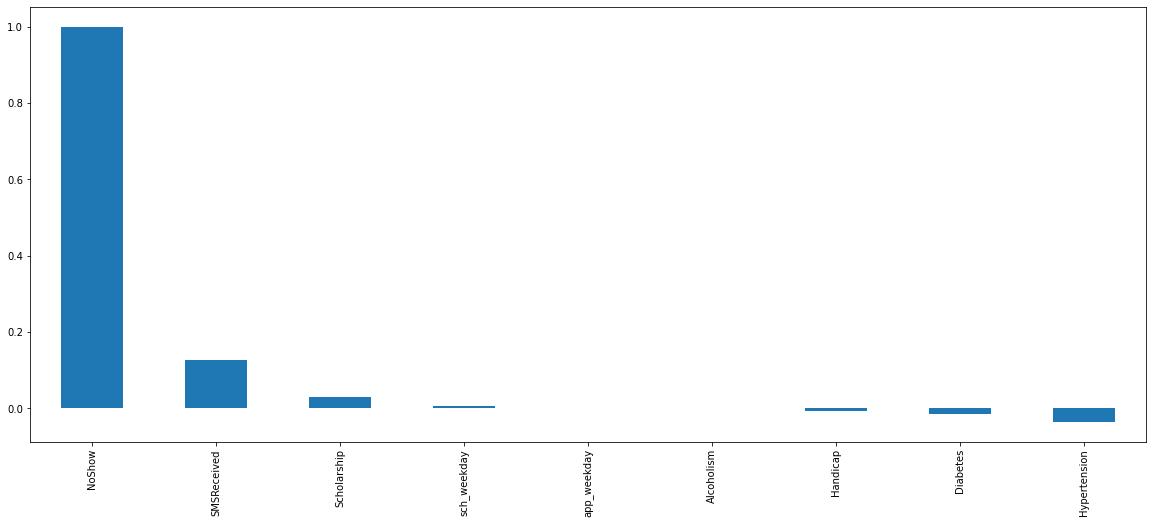

In [37]:
plt.figure(figsize=(20,8))
df_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')

### Heatmap

<AxesSubplot:>

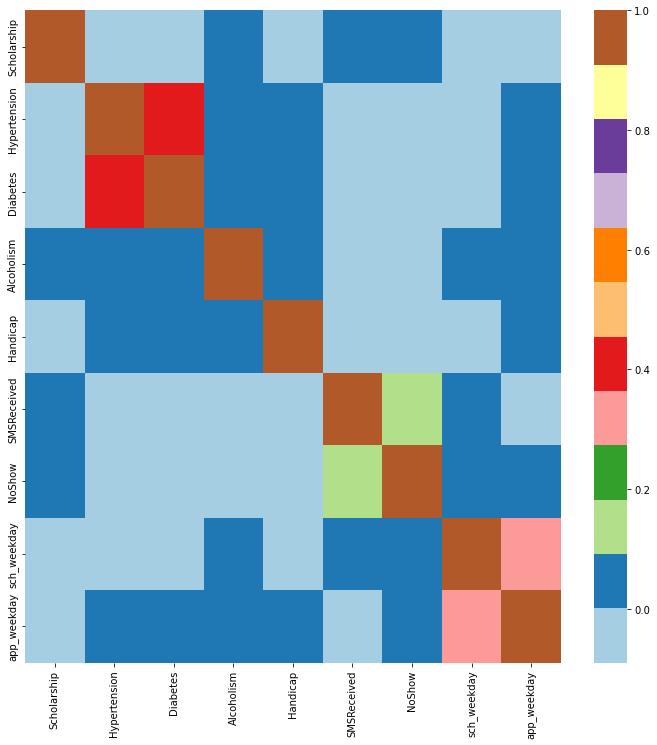

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

### Bivariate Analysis:

In [44]:
#### create two variables with name 'new_df1_target0' & 'new_df1_target1'

In [45]:
new_df1_target0=df.loc[df["NoShow"]==0]
new_df1_target1=df.loc[df["NoShow"]==1]

#### lets plot

In [47]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

#### Plot to see how many patients with hypertension has not consulted with hue as Gender

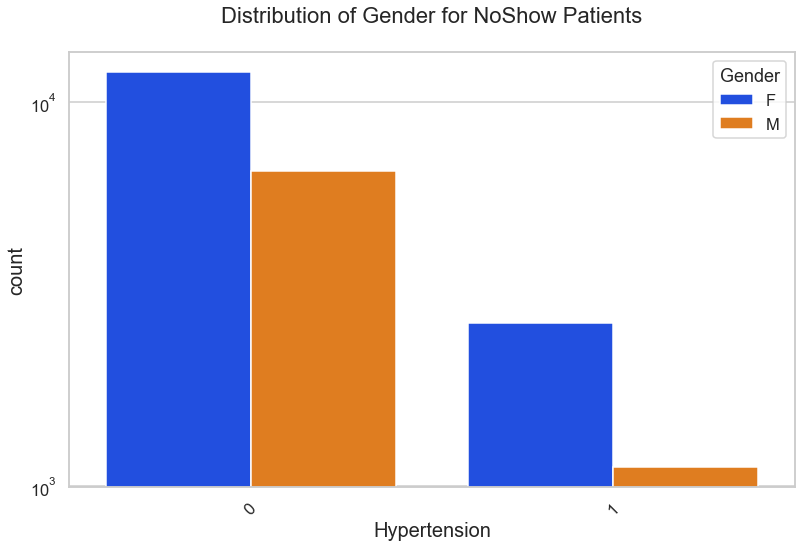

In [48]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Patients',hue='Gender')

#### here 0 represents patients with no hypertension, and 1 represents patients with hypertension

#### Now plot to see how many patients with hypertension has consulted with hue as Gender

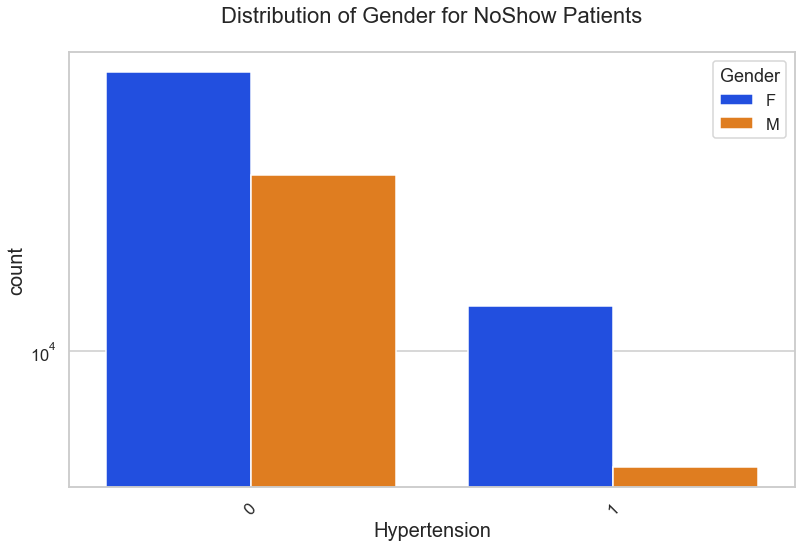

In [49]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Patients',hue='Gender')

#### Plot to see distribution of Age for NoShow Patients who had not consulted

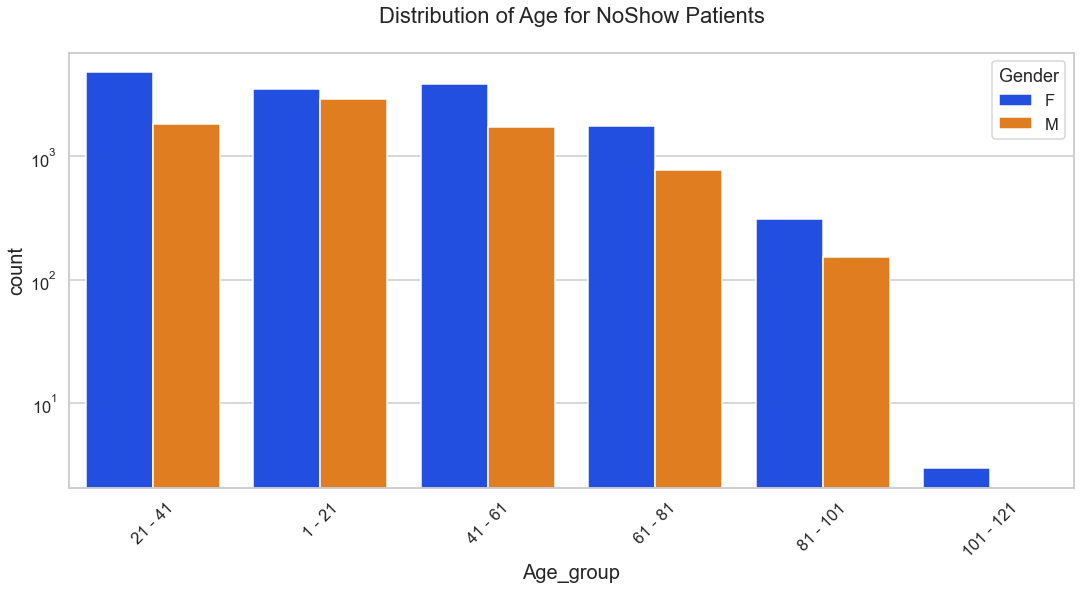

In [50]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Patients',hue='Gender')

#### Plot to see distribution of Age for NoShow Patients who had consulted

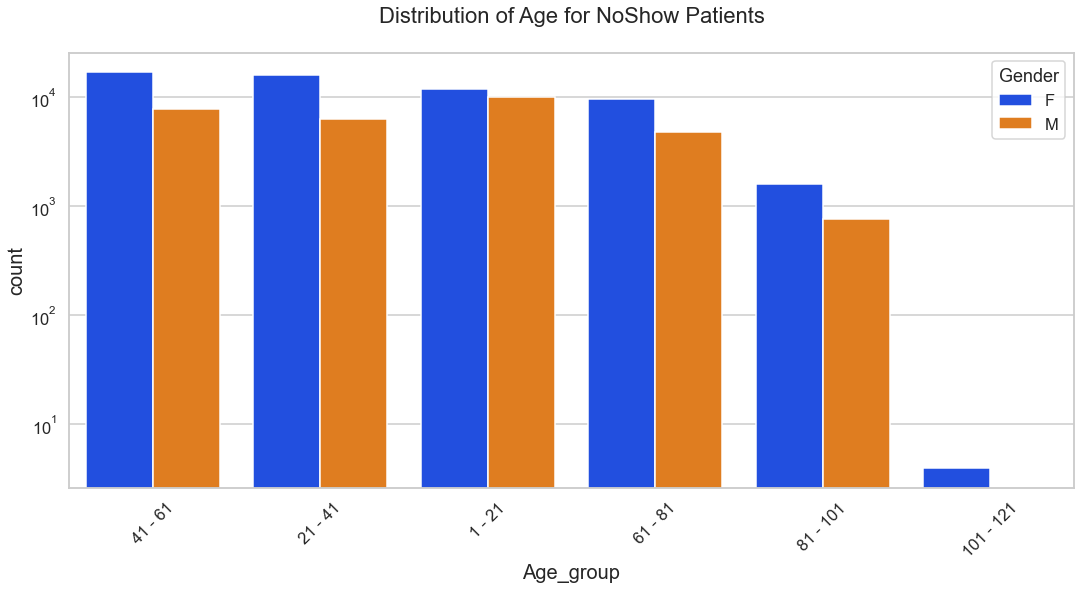

In [52]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Patients',hue='Gender')

## Insights:

1. Female patients have taken more appointments then male patients
2. Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3. Each Neighbourhood have almost 80% show rate
4. There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit
5. there are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit
6. there are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit
7. there are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit
8. there is no appointments on sunday and on saturday appointments are very less in comparision to other week days



# __HAPPY ANALYSING__ !!!